# HR Analytics Prediction: Why do People Resign?

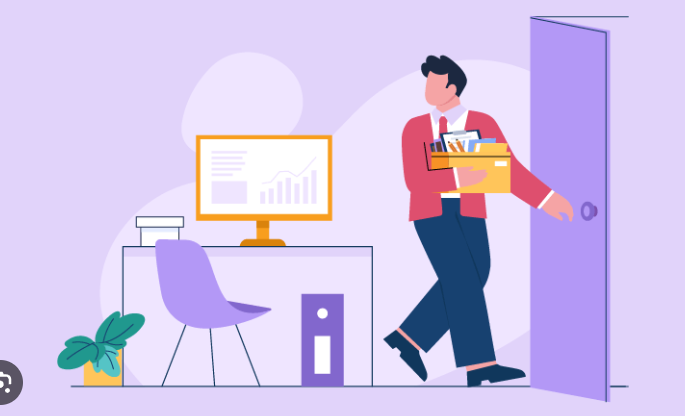

In [1]:
# Importing dependencies

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing Dataset

In [4]:
df = pd.read_csv('HR-Employee-Attrition.csv')
sns.set()

In [5]:
#Top rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Matrix shape
df.shape

(1470, 35)

In [7]:
#details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
#Null check
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#Statistical Overview
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Expolaratory Data Analysis

In [10]:
# Attrition count

In [13]:
df1 = df['Attrition'].value_counts()
df1

Attrition
No     1233
Yes     237
Name: count, dtype: int64

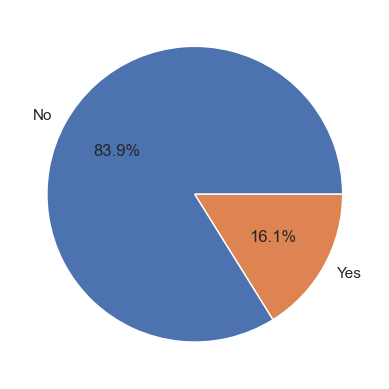

In [15]:
df1.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel(None)
plt.show()

# How is Age factor comes in Attrition ?

In [54]:
df2 = df[df['Attrition'] == 'Yes']
df2 = df2.groupby('Age')['Age'].value_counts()
df2.head()

Age
18    4
19    6
20    6
21    6
22    5
Name: count, dtype: int64

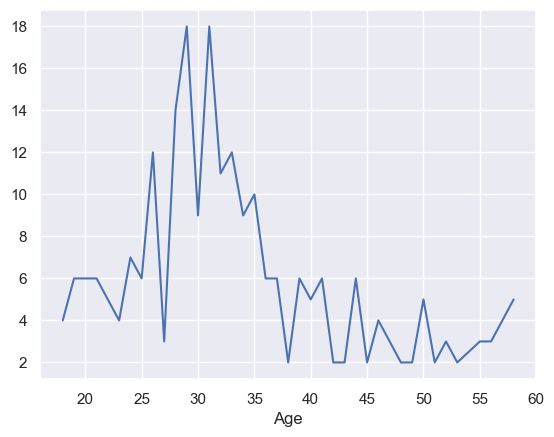

In [56]:
df2.plot()
plt.show()

Observation As seen in the chart above, the attrition is maximum between the age groups 28-32.

# Is income the main factor towards employee attrition?

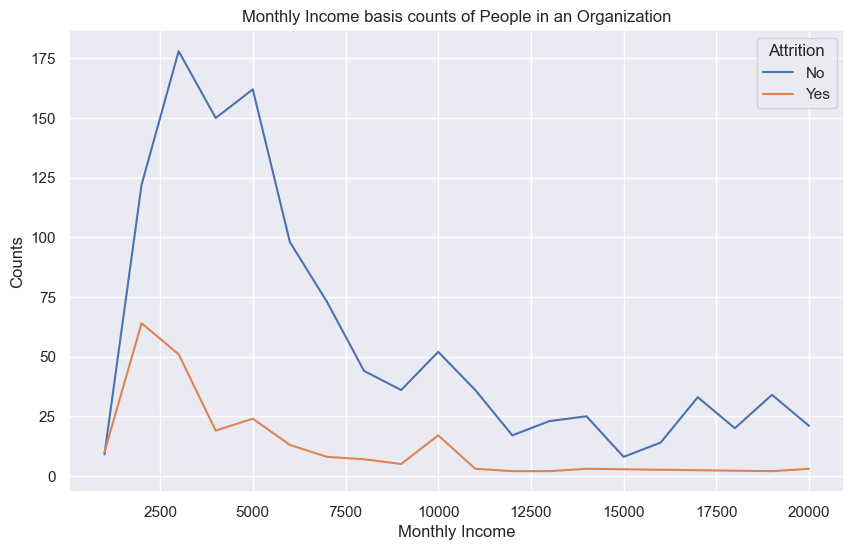

In [70]:
rate_att = df.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x: x['MonthlyIncome'].count()).reset_index(name='Counts')
rate_att['MonthlyIncome'] = round(rate_att['MonthlyIncome'], -3)
rate_att = rate_att.groupby(['MonthlyIncome', 'Attrition']).apply(lambda x: x['MonthlyIncome'].count()).reset_index(name='Counts')

# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=rate_att, x='MonthlyIncome', y='Counts', hue='Attrition')
plt.title('Monthly Income basis counts of People in an Organization')
plt.xlabel('Monthly Income')
plt.ylabel('Counts')
plt.show()

As seen in the above chart, the attrition rate is evidently high at very low income levels- less than 5k monthly.

In [72]:
# Does the Department of Work affect attrition?

In [73]:
df2 = df[df['Attrition'] == 'Yes']

In [74]:
df2['Department'].value_counts()

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64

In [144]:
dept_att = df.groupby(['Department', 'Attrition'])['Attrition'].count().reset_index(name='Counts')

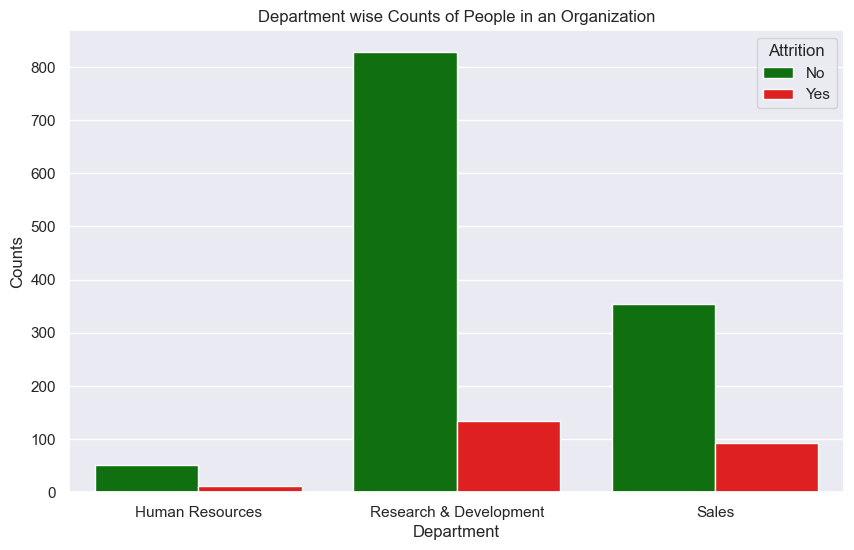

In [145]:
plt.figure(figsize=(10, 6))
sns.barplot(data=dept_att, x='Department', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('Department wise Counts of People in an Organization')
plt.xlabel('Department')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

Observations : Sales department has the highest attrition rates (25.84%), followed by the Human Resource Department (19.05%). Research and Development has the least attrition rates, that suggests the stability and content of the department as can be seen from the chart above(13.83%).

# How does self Job Satisfaction impact the Attrition?

In [146]:
satf_att = df.groupby(['JobSatisfaction','Attrition'])['Attrition'].count().reset_index(name='Counts')

In [147]:
satf_att

,JobSatisfaction,Attrition,Counts
0,1,No,223
1,1,Yes,66
2,2,No,234
3,2,Yes,46
4,3,No,369
5,3,Yes,73
6,4,No,407
7,4,Yes,52


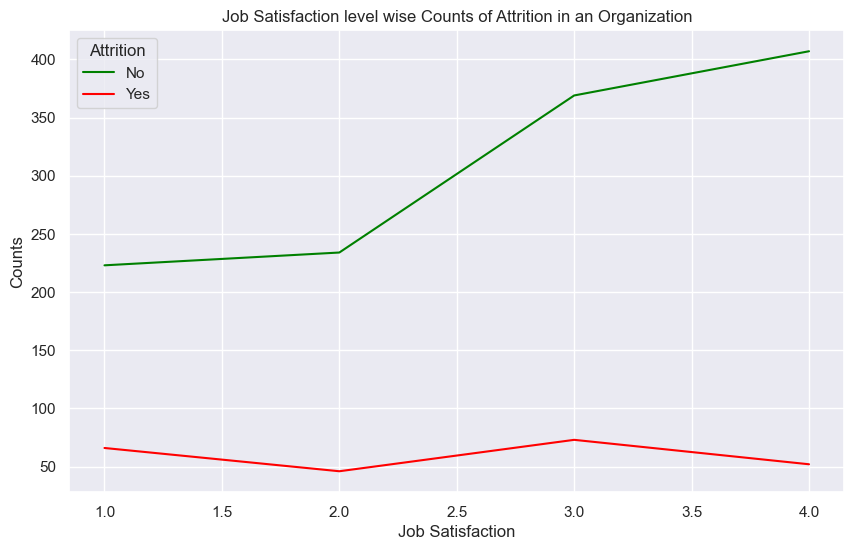

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=satf_att, x='JobSatisfaction', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('Job Satisfaction level wise Counts of Attrition in an Organization')
plt.xlabel('Job Satisfaction')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

Observation: from range 1-2 range we can infer , the attrition level falls, but raises from 2-3, where the people tend to coose better opportunities.

# How does Work Life Balance impact the overall attrition rates?¶

In [148]:
wlb_att = df.groupby(['WorkLifeBalance','Attrition'])['Attrition'].count().reset_index(name='Counts')
wlb_att

,WorkLifeBalance,Attrition,Counts
0,1,No,55
1,1,Yes,25
2,2,No,286
3,2,Yes,58
4,3,No,766
5,3,Yes,127
6,4,No,126
7,4,Yes,27


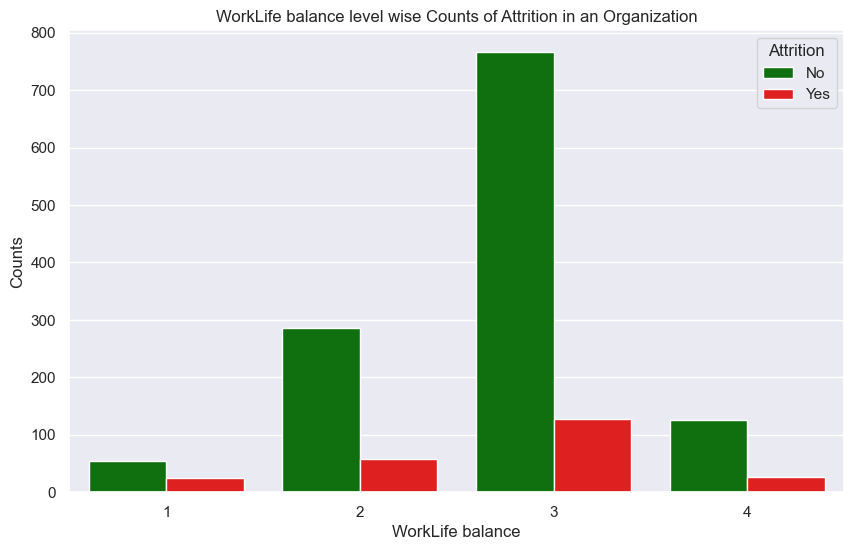

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(data=wlb_att, x='WorkLifeBalance', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('WorkLife balance level wise Counts of Attrition in an Organization')
plt.xlabel('WorkLife balance')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

### Observation 
People with poor levels of Work life balance have adjusted themselves to their jobs, but as seen for the above parameters with a better work life score, people are more accustomed to the better life and want to go for an attrition more. But this trend perishes when the work life balance is really good, and people are satisfied with the work they are doing

# How does work experience affect attrition?

In [150]:
ncw_att = df.groupby(['NumCompaniesWorked','Attrition'])['Attrition'].count().reset_index(name='Counts')
ncw_att

,NumCompaniesWorked,Attrition,Counts
0,0,No,174
1,0,Yes,23
2,1,No,423
3,1,Yes,98
4,2,No,130
5,2,Yes,16
6,3,No,143
7,3,Yes,16
8,4,No,122
9,4,Yes,17


In [105]:
import plotly.express as px

In [151]:
px.area(ncw_att,x='NumCompaniesWorked',y='Counts',color='Attrition',title='Work Experience level Counts of People in an Organization')

### Observations 
As seen from the chart above, clearly, employees who started their career with the company- or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company. People who have gained much experience- working in multiple companies tend to stay in the company they join.

# How does Work duration in current role impact Attrition?

In [152]:
nycr_att = df.groupby(['YearsInCurrentRole','Attrition'])['Attrition'].count().reset_index(name='Counts')
nycr_att

,YearsInCurrentRole,Attrition,Counts
0,0,No,171
1,0,Yes,73
2,1,No,46
3,1,Yes,11
4,2,No,304
5,2,Yes,68
6,3,No,119
7,3,Yes,16
8,4,No,89
9,4,Yes,15


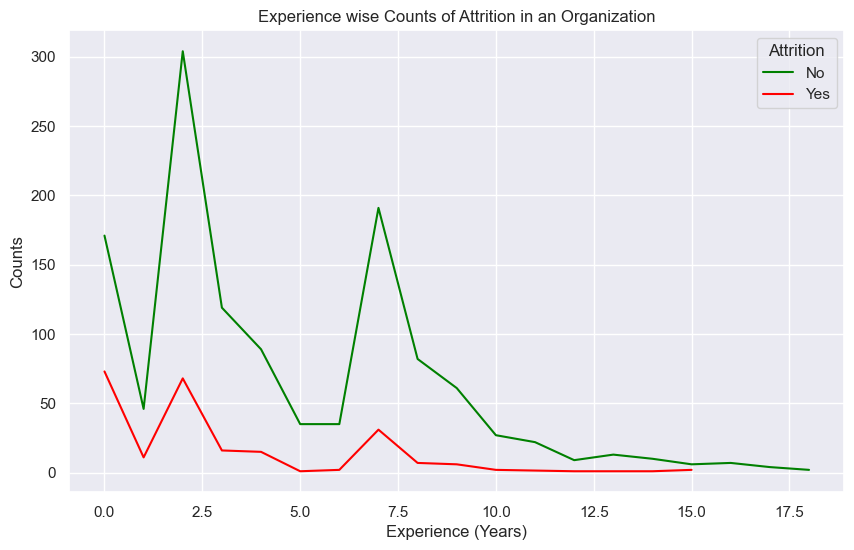

In [153]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=nycr_att, x='YearsInCurrentRole', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('Experience wise Counts of Attrition in an Organization')
plt.xlabel('Experience (Years)')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

### Observation
We have seen people are more prone to leave the organization in the starting years on their role. When people are in the same role for a long period of time, they tend to stay longer for moving in an upward role.

# Does Hike percentage impact Attrition?

In [154]:
hike_att = df.groupby(['PercentSalaryHike','Attrition'])['Attrition'].count().reset_index(name='Counts')
hike_att

,PercentSalaryHike,Attrition,Counts
0,11,No,169
1,11,Yes,41
2,12,No,165
3,12,Yes,33
4,13,No,175
5,13,Yes,34
6,14,No,177
7,14,Yes,24
8,15,No,83
9,15,Yes,18


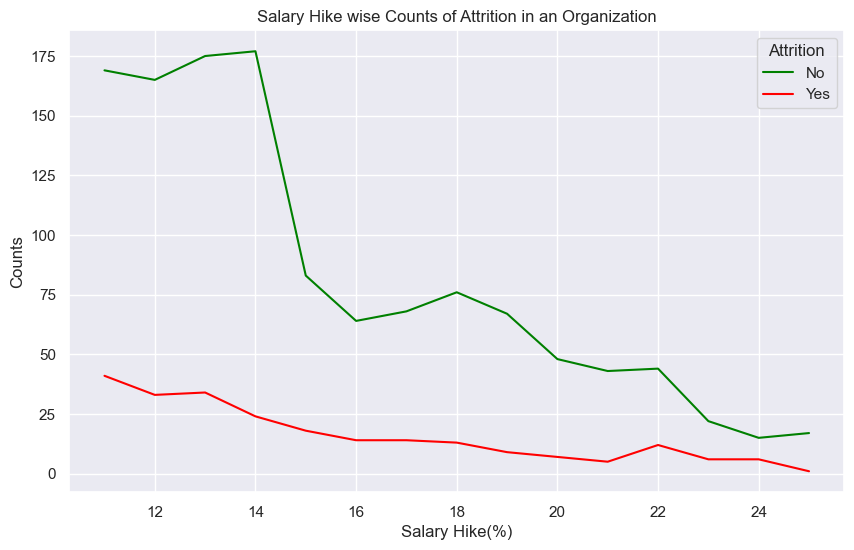

In [111]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=hike_att, x='PercentSalaryHike', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('Salary Hike wise Counts of Attrition in an Organization')
plt.xlabel('Salary Hike(%)')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

Higher hikes motivate people to work better, and stay in the organization. Hence we see the chances of an employee leaving the organization where the hike is lower, is much more than a company that gives a good hike.

In [114]:
# Gender wise attrition

In [155]:
gen_att = df.groupby(['Gender','Attrition'])['Attrition'].count().reset_index(name='Counts')
gen_att

,Gender,Attrition,Counts
0,Female,No,501
1,Female,Yes,87
2,Male,No,732
3,Male,Yes,150


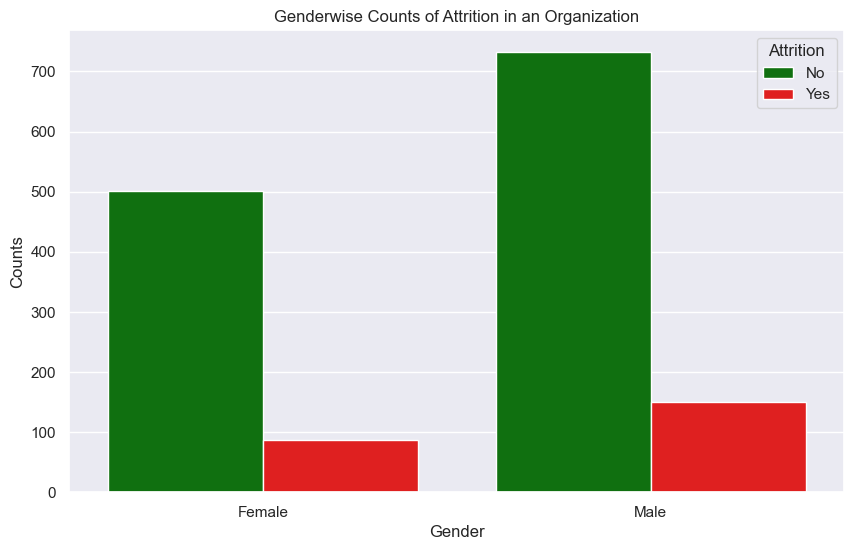

In [118]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gen_att, x='Gender', y='Counts', hue='Attrition', palette=['green', 'red'])
plt.title('Genderwise Counts of Attrition in an Organization')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend(title='Attrition')
plt.show()

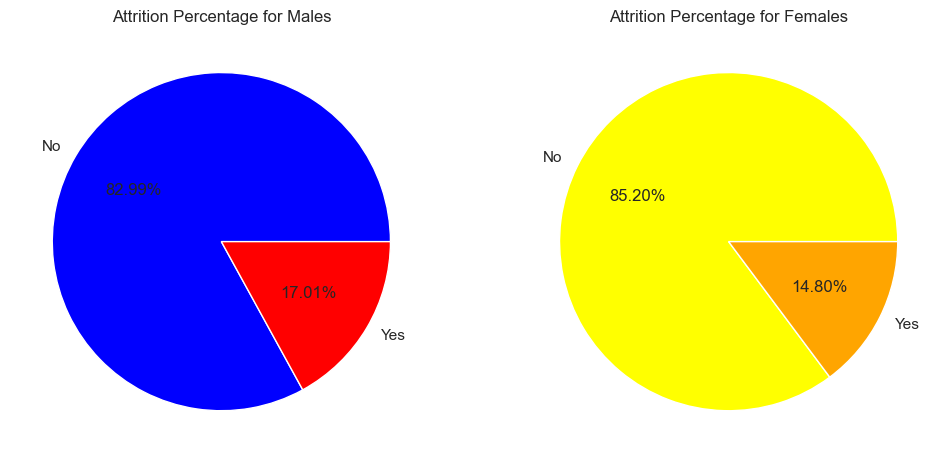

In [127]:
grouped_data = gen_att.groupby(['Gender', 'Attrition'])['Counts'].sum().unstack().fillna(0)

# Plotting pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie(grouped_data.loc['Male'], labels=grouped_data.columns, autopct='%1.2f%%', colors=['blue', 'red'])
axes[0].set_title('Attrition Percentage for Males')

# Female pie chart
axes[1].pie(grouped_data.loc['Female'], labels=grouped_data.columns, autopct='%1.2f%%', colors=['yellow', 'orange'])
axes[1].set_title('Attrition Percentage for Females')

plt.show()

Lets try to predict for all the given inputs, how accurately can we we predict wether an employee will be staying in the organization or resigning from it.

# Algorithm applied: Logistic Regression

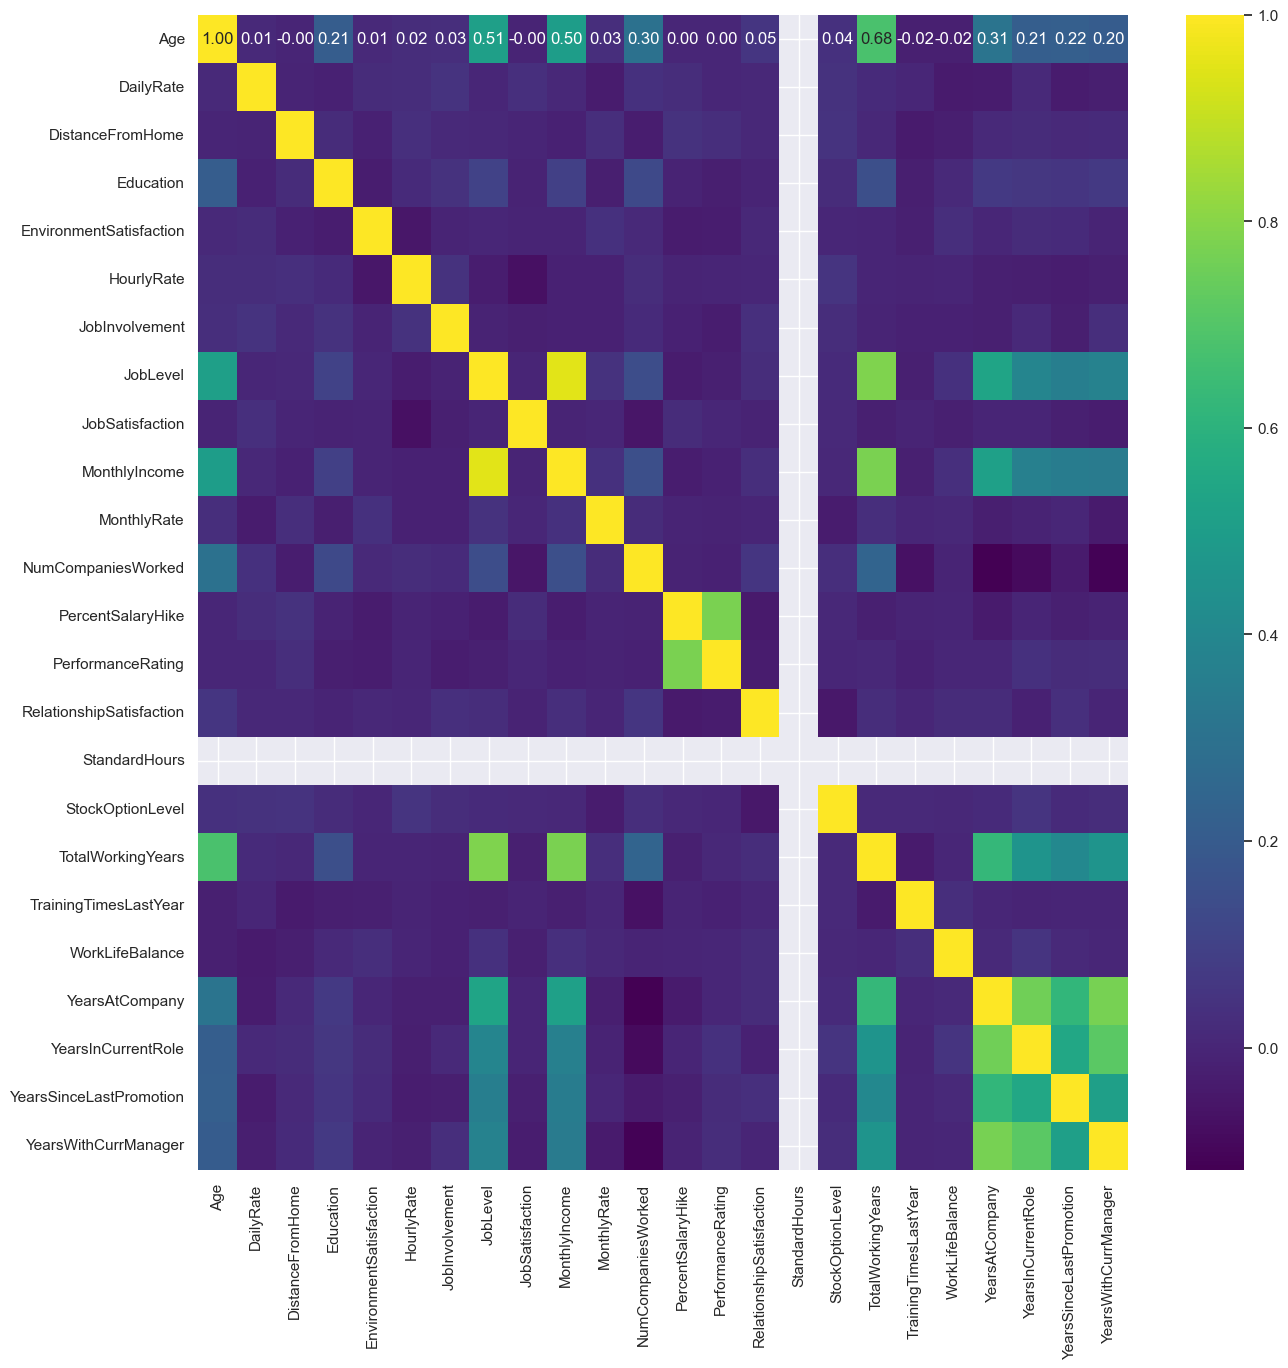

In [134]:
X=df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=df[['Attrition']].values.ravel()
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True,fmt='.2f',cmap='viridis')
plt.show()

# Importing Sklearn model

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [140]:
X=df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
        'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction','StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y=df[['Attrition']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.856
Test Model accruracy scores: 0.848
--------------------------------------------------------------------------


# Improving accuracy by feature engineering

In [159]:
data_dummies=pd.get_dummies(df)
features=data_dummies[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Over18_Y',
       'OverTime_No', 'OverTime_Yes']]
X=features.values
y=data_dummies[['Attrition_Yes']].values.ravel()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
log_reg=LogisticRegression(C=1000,max_iter=10000)
log_reg.fit(X_train,y_train)
print('--------------------------------------------------------------------------')
print('Logistic Regression:')
print('Traning Model accruracy scores: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Test Model accruracy scores: {:.3f}'.format(log_reg.score(X_test,y_test)))
print('--------------------------------------------------------------------------')

--------------------------------------------------------------------------
Logistic Regression:
Traning Model accruracy scores: 0.891
Test Model accruracy scores: 0.897
--------------------------------------------------------------------------


# Calculating Model Precision,Recall,F1 score

In [156]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming 'log_reg' is your trained Logistic Regression model

# Predictions
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Calculate precision, recall, and F1-score
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# Print results
print('Precision (Train): {:.3f}'.format(precision_train))
print('Precision (Test): {:.3f}'.format(precision_test))
print('Recall (Train): {:.3f}'.format(recall_train))
print('Recall (Test): {:.3f}'.format(recall_test))
print('F1-score (Train): {:.3f}'.format(f1_train))
print('F1-score (Test): {:.3f}'.format(f1_test))

Precision (Train): 0.786
Precision (Test): 0.794
Recall (Train): 0.453
Recall (Test): 0.466
F1-score (Train): 0.574
F1-score (Test): 0.587


# Hyper Parameter Tuning using Grid Search

In [157]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter
    'max_iter': [100, 500, 1000, 5000, 10000, 20000]           # Maximum number of iterations
}

# Create GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best F1-score:", best_score)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Parameters: {'C': 1000, 'max_iter': 5000}
Best F1-score: 0.5486153517668411
